In [ ]:
!pip install chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 60.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147775 sha256=36fbcf77db01153e226a3e50bf3ed82af94ec689d4f2e3c6469b4eecd9893fb3
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


In [ ]:
import chess
import chess.engine
import random
import numpy

# this function will create our x (board)
def random_board(max_depth=200):
    board = chess.Board()
    depth = random.randrange(0, max_depth)

    for _ in range(depth):
        all_moves = list(board.legal_moves)
        random_move = random.choice(all_moves)
        board.push(random_move)
        if board.is_game_over():
            break

    return board


# this function will create our f(x) (score)
def stockfish(board, depth):
    # Updated path to Stockfish executable (now in system PATH)
    with chess.engine.SimpleEngine.popen_uci('stockfish') as sf:
        result = sf.analyse(board, chess.engine.Limit(depth=depth))
        score = result['score'].white().score()
    return score

# New section

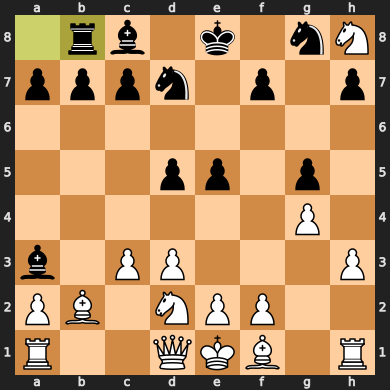

In [ ]:
board = random_board()
board

In [ ]:
# Download Stockfish
!sudo apt-get install -y stockfish


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  polyglot xboard | scid
The following NEW packages will be installed:
  stockfish
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 24.8 MB of archives.
After this operation, 47.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 stockfish amd64 14.1-1 [24.8 MB]
Fetched 24.8 MB in 0s (61.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package stockfish.
(Readin

In [ ]:
!apt-get remove -y stockfish
!apt-get install -y stockfish
!which stockfish


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages will be REMOVED:
  stockfish
0 upgraded, 0 newly installed, 1 to remove and 35 not upgraded.
After this operation, 47.4 MB disk space will be freed.
(Reading database ... 126288 files and directories currently installed.)
Removing stockfish (14.1-1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  polyglot xboard | scid
The following NEW packages will be installed:
  stockfish
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 24.8 MB of archives.
After this operation, 47.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 stockfish amd64 14.1-1 [24.8 MB]
Fetched 24.8 MB in 1s (45.2 MB/s)
Selecting previously unselected package stockfish.
(Reading database ... 126281 files a

In [ ]:
import chess
import chess.engine

def stockfish(board, depth=10):
    engine_path = "/usr/games/stockfish"  # Confirmed path
    with chess.engine.SimpleEngine.popen_uci(engine_path) as engine:
        result = engine.analyse(board, chess.engine.Limit(depth=depth))
        return result["score"].white().score()


In [ ]:
board = chess.Board()
print(stockfish(board, 10))


35


In [ ]:
import chess
import numpy as np

# Mapping from file (a-h) to index (0-7)
squares_index = {
    'a': 0,
    'b': 1,
    'c': 2,
    'd': 3,
    'e': 4,
    'f': 5,
    'g': 6,
    'h': 7
}

# Convert square to (row, col) index
def square_to_index(square):
    letter = chess.square_name(square)
    return 8 - int(letter[1]), squares_index[letter[0]]

# Split the board into 3D representation
def split_dims(board):
    board3d = np.zeros((14, 8, 8), dtype=np.int8)

    # Add the pieces' view on the matrix
    for piece in chess.PIECE_TYPES:
        for square in board.pieces(piece, chess.WHITE):
            idx = np.unravel_index(square, (8, 8))
            board3d[piece - 1][7 - idx[0]][idx[1]] = 1
        for square in board.pieces(piece, chess.BLACK):
            idx = np.unravel_index(square, (8, 8))
            board3d[piece + 5][7 - idx[0]][idx[1]] = 1

    # Add legal moves for both sides
    aux = board.turn
    board.turn = chess.WHITE
    for move in board.legal_moves:
        i, j = square_to_index(move.to_square)
        board3d[12][i][j] = 1
    board.turn = chess.BLACK
    for move in board.legal_moves:
        i, j = square_to_index(move.to_square)
        board3d[13][i][j] = 1
    board.turn = aux

    return board3d

# Example usage
board = chess.Board()
board3d = split_dims(board)

# Print the 3D board representation for inspection
print(board3d)


[[[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 1 1 1 1 1 1 1]
  [0 0 0 0 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 1 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 1 0 0 1 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [1 0 0 0 0 0 0 1]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0]]

 [[0 0 0 0 0 0 0 0]
  [1 1 1

In [ ]:
split_dims(board)

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        

In [ ]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers

def build_model(conv_size, conv_depth):
    board3d = layers.Input(shape=(14, 8, 8))

    # adding the convolutional layers
    x = board3d
    for _ in range(conv_depth):
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', activation='relu')(x)

    # Flatten and Dense layers after the convolutional layers
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return models.Model(inputs=board3d, outputs=x)

# Example usage:
model = build_model(conv_size=32, conv_depth=3)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 14, 8, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 8, 32)      │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 8, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 8, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3584)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       229,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,337 (977.88 KB)

 Trainable params: 250,337 (977.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

def build_model_residual(conv_size, conv_depth):
    board3d = layers.Input(shape=(14, 8, 8))
    # Adding the convolutional layers
    x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_last')(board3d)
    for _ in range(conv_depth):
        previous = x
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_last')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_last')(x)
        x = layers.BatchNormalization()(x)
        x = layers.Add()([x, previous])
        x = layers.Activation('relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return models.Model(inputs=board3d, outputs=x)


In [ ]:
import numpy as np
import tensorflow.keras.callbacks as callbacks

# Step 1: Generate and Save the dataset
def create_dataset():
    # Generate sample data
    b = np.random.rand(100, 8, 8)  # Example shape for b
    v = np.random.rand(100)        # Example shape for v

    # Save data to `dataset.npz`
    np.savez('dataset.npz', b=b, v=v)

# Create the dataset
create_dataset()

# Step 2: Load and Use the dataset
def get_dataset():
    container = np.load('dataset.npz')
    b, v = container['b'], container['v']
    v = np.asarray(v / abs(v).max() / 2 + 0.5, dtype=np.float32)  # normalization
    return b, v

# Load the dataset
x_train, y_train = get_dataset()

# Print the shapes of the training data
print(x_train.shape)
print(y_train.shape)


(100, 8, 8)
(100,)


In [ ]:
!pip install python-chess


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Generate dummy data for training
x_train = np.random.random((1000, 64))
y_train = np.random.randint(2, size=(1000, 1))

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(64,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('/content/chess_model.keras')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5387 - loss: 0.6952 - val_accuracy: 0.5100 - val_loss: 0.6928
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5740 - loss: 0.6841 - val_accuracy: 0.5550 - val_loss: 0.6952
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5739 - loss: 0.6796 - val_accuracy: 0.4800 - val_loss: 0.6967
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5967 - loss: 0.6689 - val_accuracy: 0.4700 - val_loss: 0.7015
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6111 - loss: 0.6638 - val_accuracy: 0.4350 - val_loss: 0.7127
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6253 - loss: 0.6564 - val_accuracy: 0.4750 - val_loss: 0.7060
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6514 - loss: 0.6437 - val_accuracy: 0.4550 - val_loss: 0.7427
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5983 - loss: 0.6520 - val_accuracy: 0.4850 - val_loss

In [ ]:
import numpy

def minimax_eval(board):
    board3d = split_dims(board)
    board3d = numpy.expand_dims(board3d, 0)
    return model.predict(board3d)[0][0]

def minimax(board, depth, alpha, beta, maximizing_player):
    if depth == 0 or board.is_game_over():
        return minimax_eval(board)

    if maximizing_player:
        max_eval = -numpy.inf
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, False)
            board.pop()
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = numpy.inf
        for move in board.legal_moves:
            board.push(move)
            eval = minimax(board, depth - 1, alpha, beta, True)
            board.pop()
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

def get_ai_move(board, depth):
    max_move = None
    max_eval = -numpy.inf

    for move in board.legal_moves:
        board.push(move)
        eval = minimax(board, depth - 1, -numpy.inf, numpy.inf, False)
        board.pop()
        if eval > max_eval:
            max_eval = eval
            max_move = move

    return max_move

# You might need to define 'split_dims' and 'model' somewhere in your code.
# Additionally, you're missing indentation for the 'get_ai_move' function.


In [ ]:
!pip install chess

In [ ]:
import chess
from tensorflow import keras
import numpy as np

# Load the trained model
model = keras.models.load_model('/content/chess_model.keras')

# Define a function to convert the board to a matrix representation
def board_to_matrix(board):
    matrix = np.zeros((8, 8), dtype=int)
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            matrix[i // 8][i % 8] = piece.piece_type
    # Flatten the matrix to a 1D array
    return matrix.flatten()

# Define a function to convert the model's output to a move
def matrix_to_move(prediction, board):
    # This is a placeholder. You need to define the logic to
    # convert the model's prediction into a valid chess move.
    # For example, you might need to interpret the prediction as
    # probabilities for each possible move and select the move
    # with the highest probability.
    # This implementation will just return a random legal move for demonstration.
    legal_moves = list(board.legal_moves)
    if legal_moves:
        return np.random.choice(legal_moves)
    else:
        return None  # Handle the case where there are no legal moves

# Define a function to predict the best move using the trained model
def predict_best_move(board):
    matrix = board_to_matrix(board)
    # Reshape the input to match the expected shape (None, 64)
    prediction = model.predict(np.array([matrix]))
    move = matrix_to_move(prediction, board) # Pass the board to matrix_to_move
    return move

# Initialize a chess board
board = chess.Board()

# Play a game against the AI
while not board.is_game_over():
    # Display the board
    print(board)

    # Get the best move from the AI
    ai_move = predict_best_move(board)
    if ai_move is None:
        print("AI has no legal moves. Game over.")
        break
    print(f"AI move: {ai_move}")

    # Make the AI move on the board
    board.push(ai_move)

    # Now it's the user's turn
    user_move = input("Your move: ")

    # Parse the user's move and make it on the board
    try:
        board.push_san(user_move)
    except ValueError:
        print("Invalid move. Try again.")
        continue

# Print the final result
print("Game over")
print(board.result())

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
AI move: e2e4
r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . P . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
AI move: b1a3
